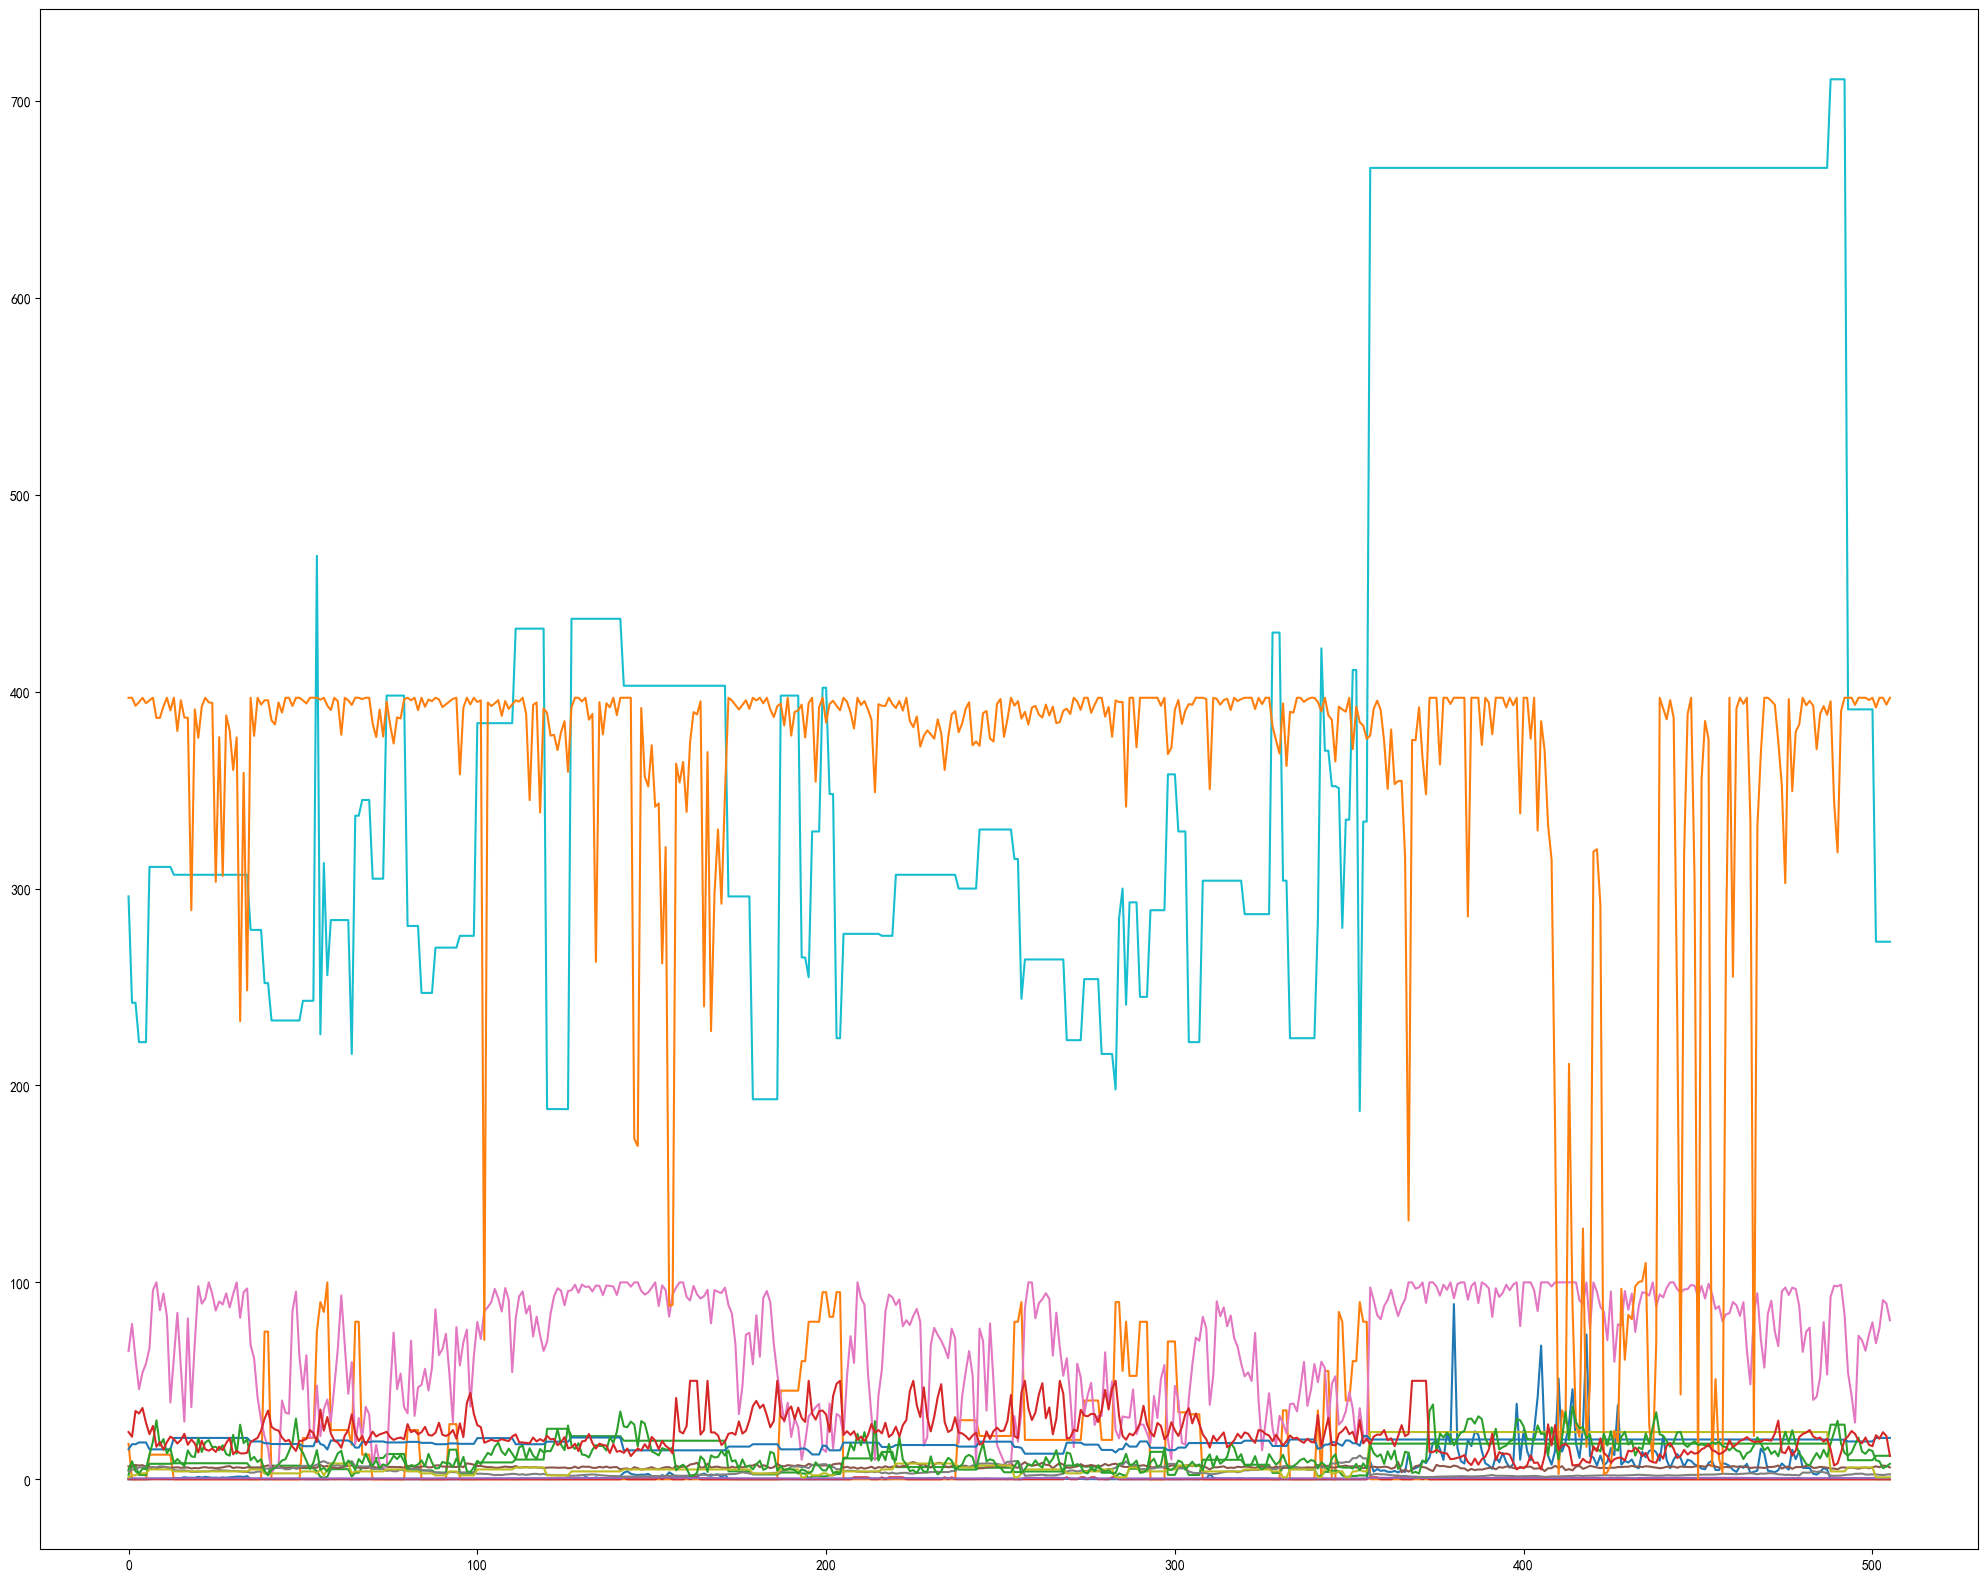

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
#设置绘图大小
plt.style.use({'figure.figsize':(25,20)})
plt.rcParams['font.sans-serif']=['SimHei']#用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号

# 读取数据集
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
ch_names = ['城镇人均犯罪率', '占地面积超过25000平方英尺的住宅用地比例', '非零售商业用地占比', '是否临河', '氮氧化物浓度',
            '房屋房间数', '房屋年龄', '和就业中心的距离', '是否容易上高速路', '税率', '学生人数比老师人数',
            '城镇黑人比例计算的统计值', '低收入人群比例', '房价中位数']
#加表头
# data.columns = names
data.columns = ch_names
#画图
plt.plot(data)
plt.show()

In [3]:
#预处理
print(data.head())
print(data.describe())
print(data.shape)

   城镇人均犯罪率  占地面积超过25000平方英尺的住宅用地比例  非零售商业用地占比  是否临河  氮氧化物浓度  房屋房间数  房屋年龄  \
0  0.00632                    18.0       2.31     0   0.538  6.575  65.2   
1  0.02731                     0.0       7.07     0   0.469  6.421  78.9   
2  0.02729                     0.0       7.07     0   0.469  7.185  61.1   
3  0.03237                     0.0       2.18     0   0.458  6.998  45.8   
4  0.06905                     0.0       2.18     0   0.458  7.147  54.2   

   和就业中心的距离  是否容易上高速路     税率  学生人数比老师人数  城镇黑人比例计算的统计值  低收入人群比例  房价中位数  
0    4.0900         1  296.0       15.3        396.90     4.98   24.0  
1    4.9671         2  242.0       17.8        396.90     9.14   21.6  
2    4.9671         2  242.0       17.8        392.83     4.03   34.7  
3    6.0622         3  222.0       18.7        394.63     2.94   33.4  
4    6.0622         3  222.0       18.7        396.90     5.33   36.2  
          城镇人均犯罪率  占地面积超过25000平方英尺的住宅用地比例   非零售商业用地占比        是否临河      氮氧化物浓度  \
count  506.000000             

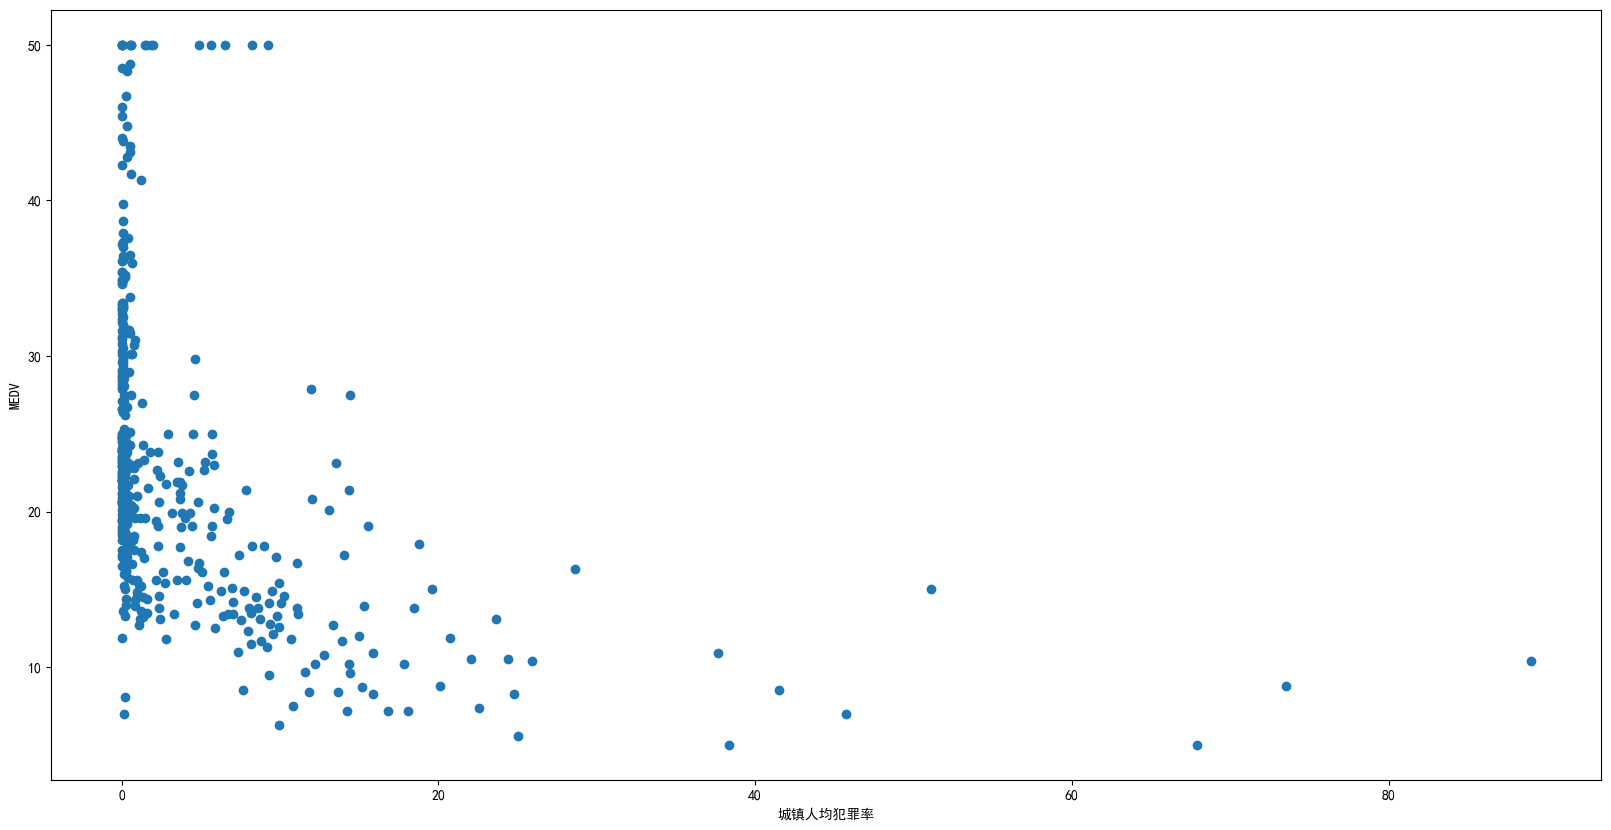

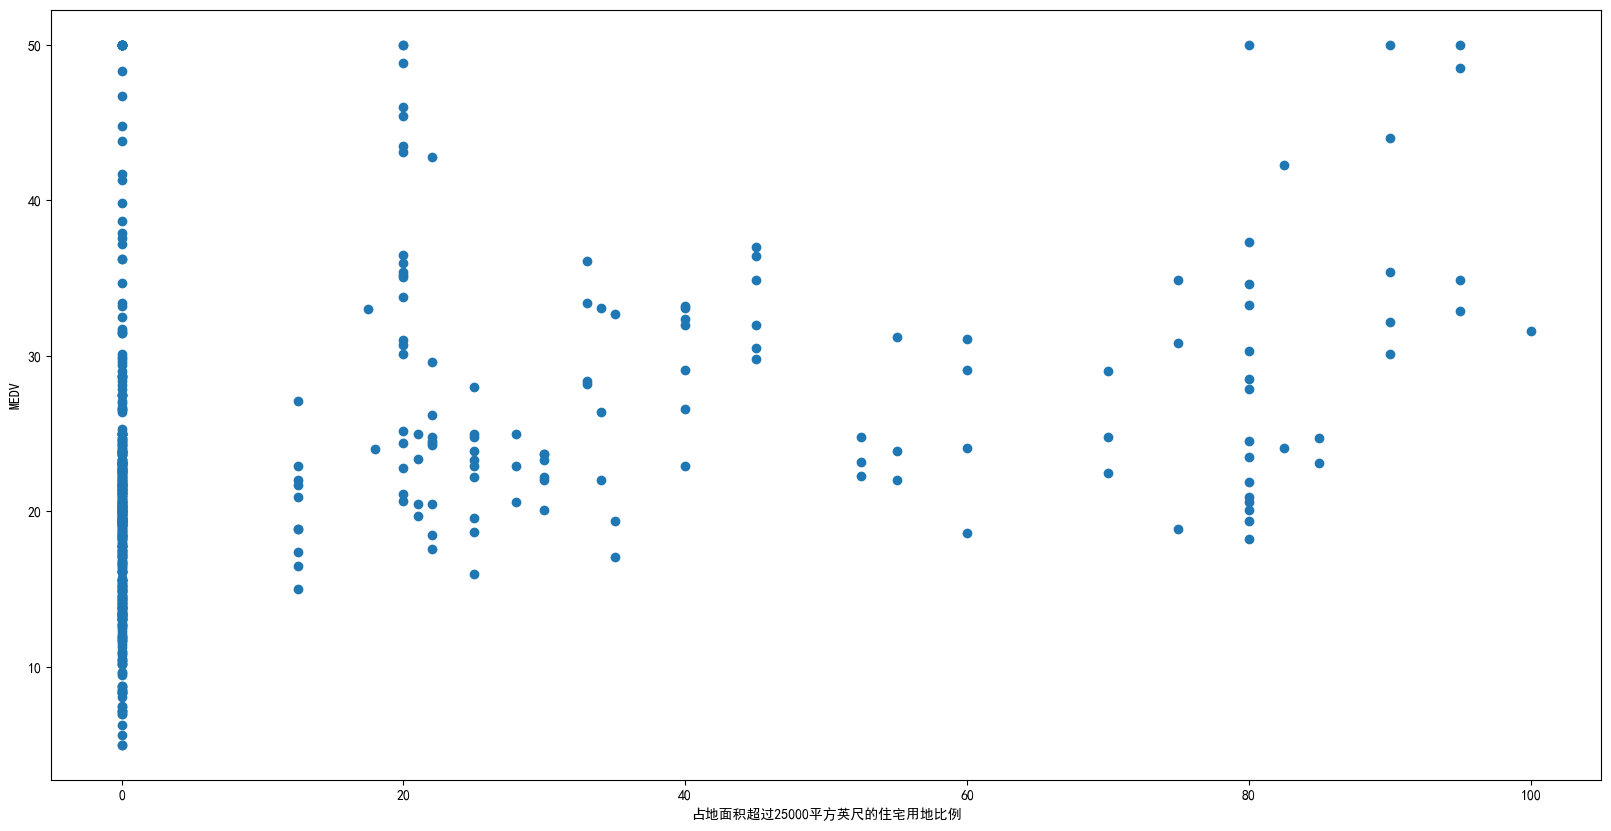

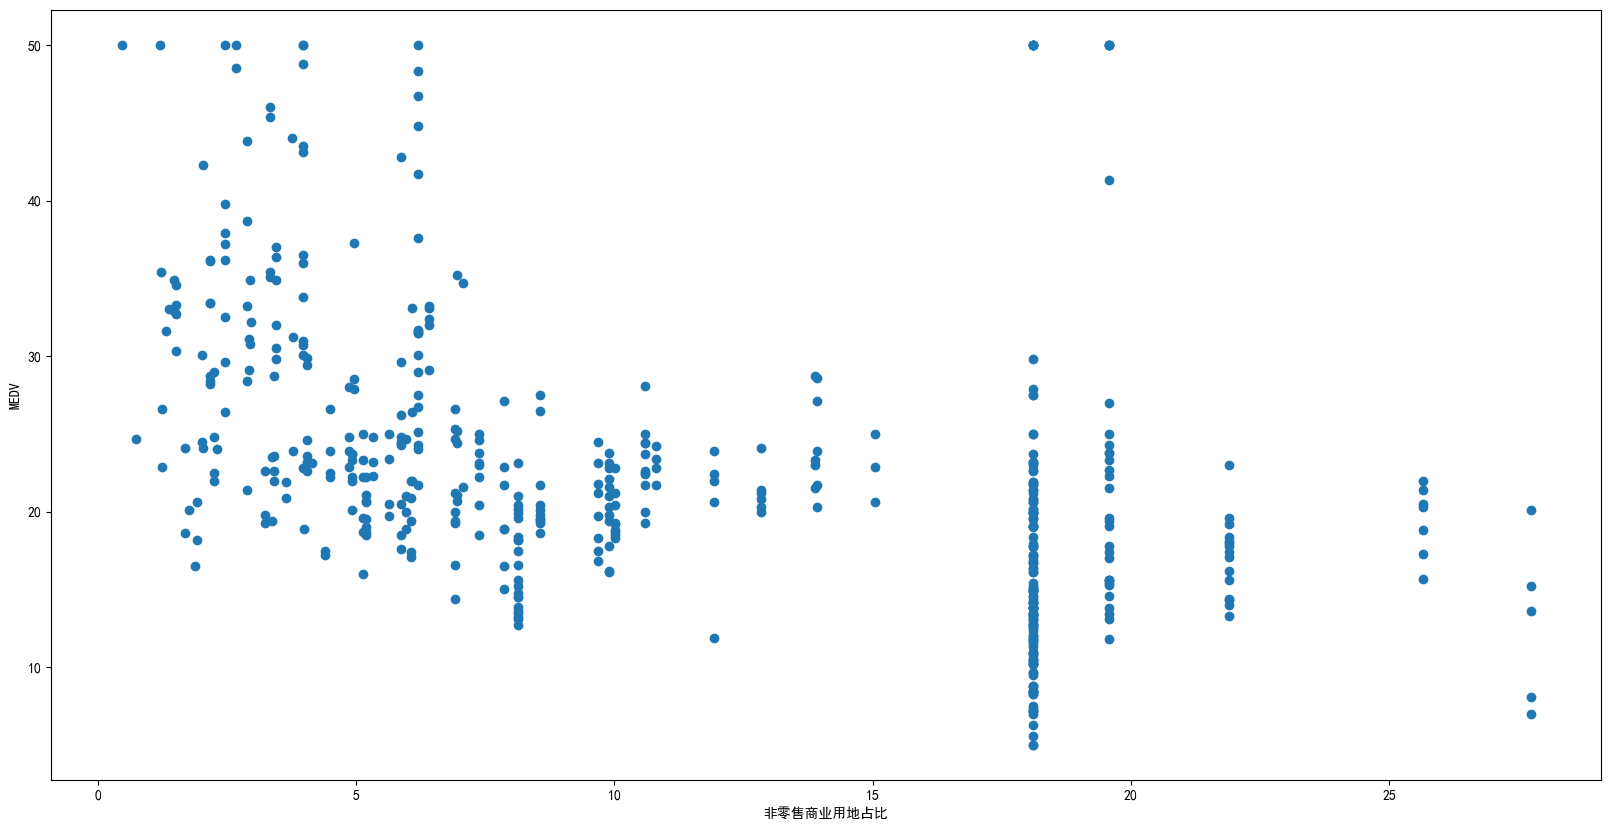

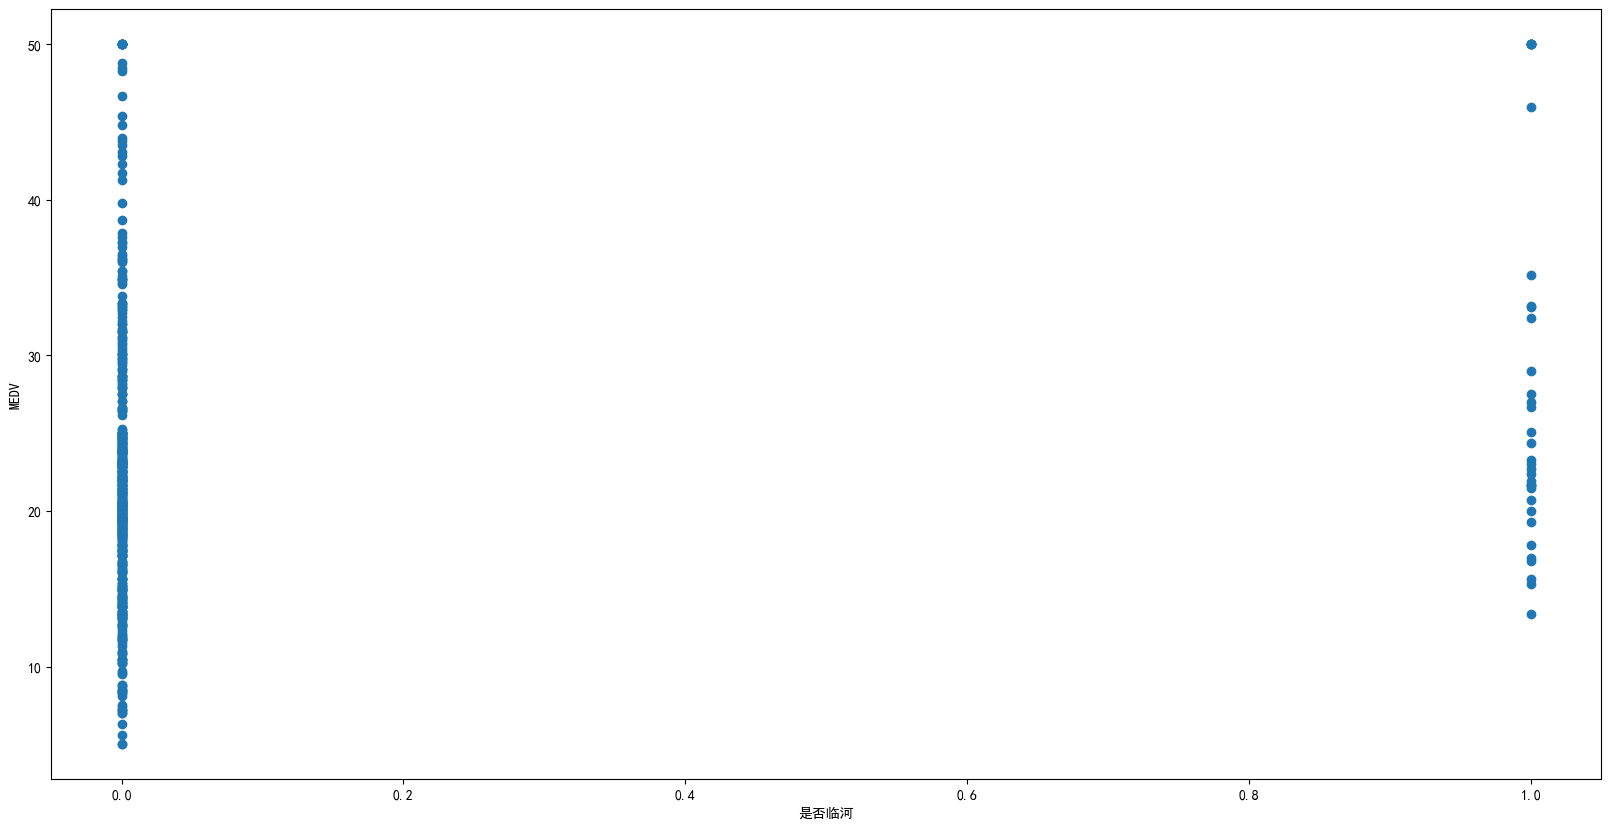

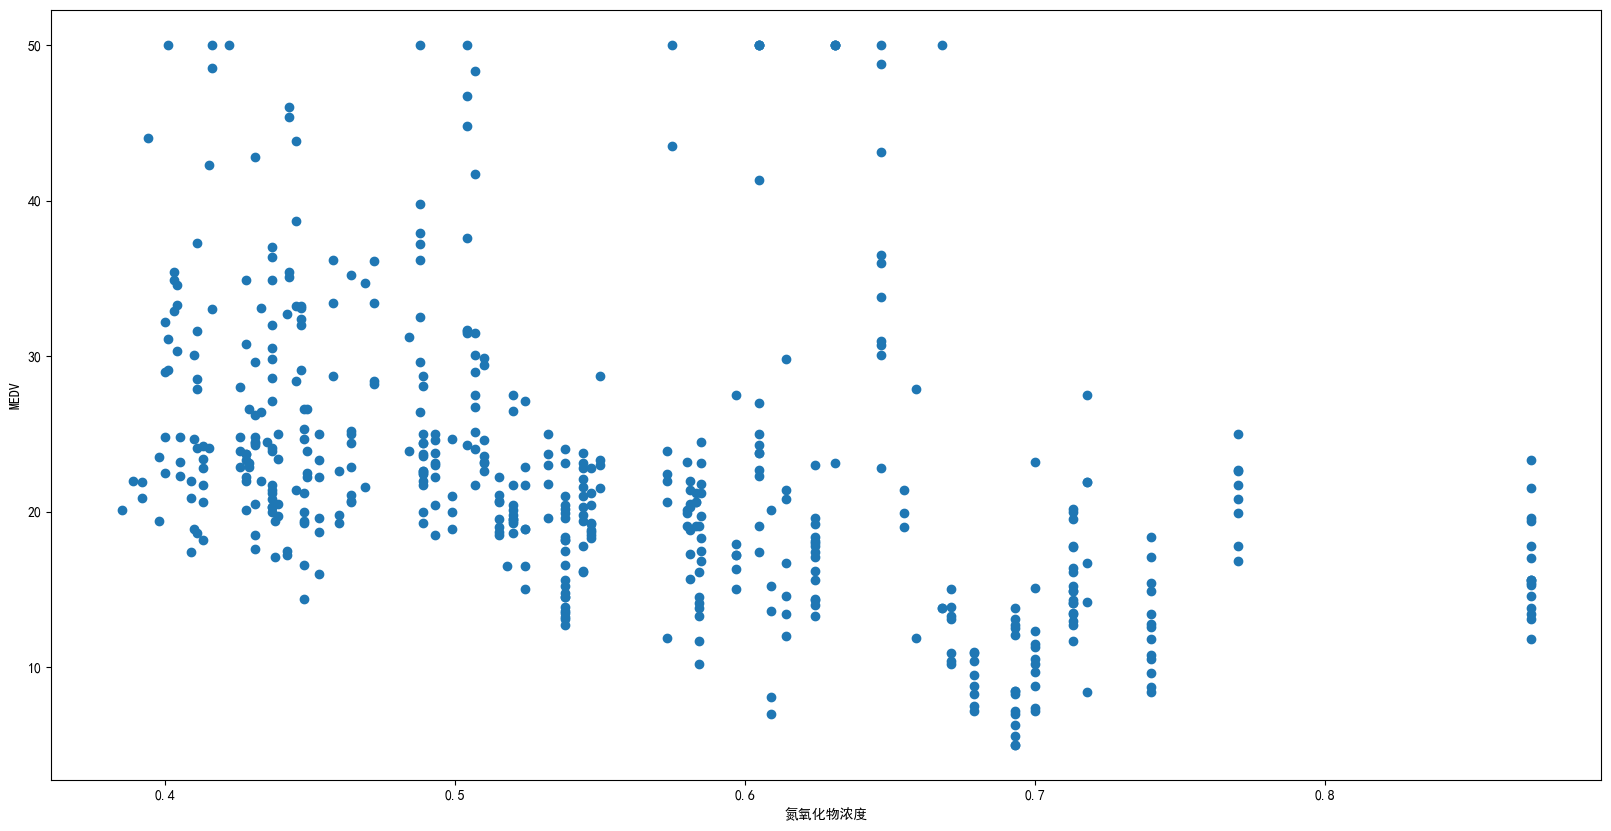

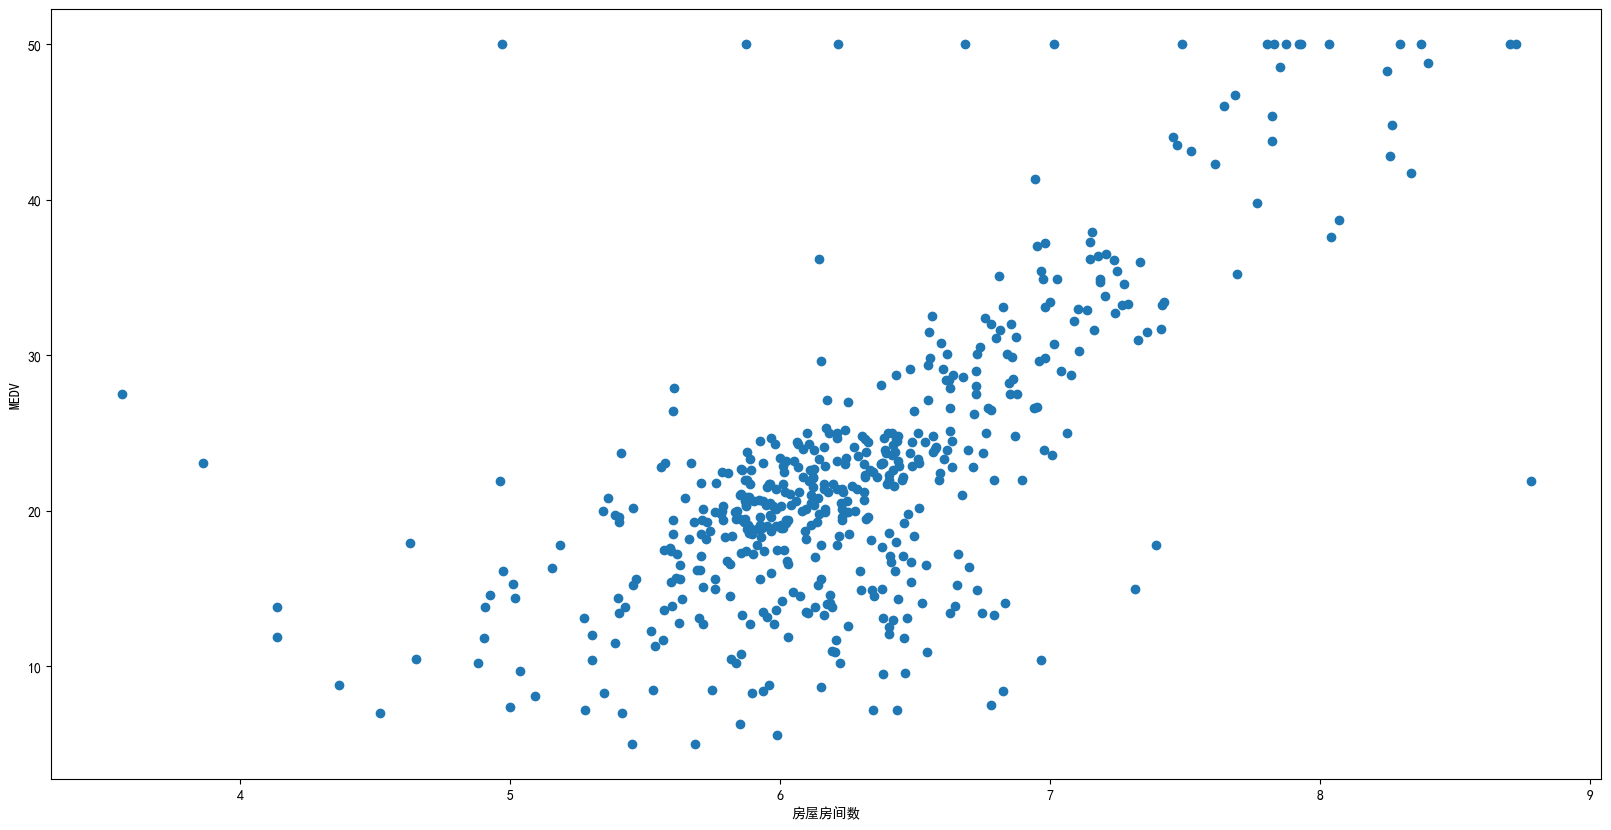

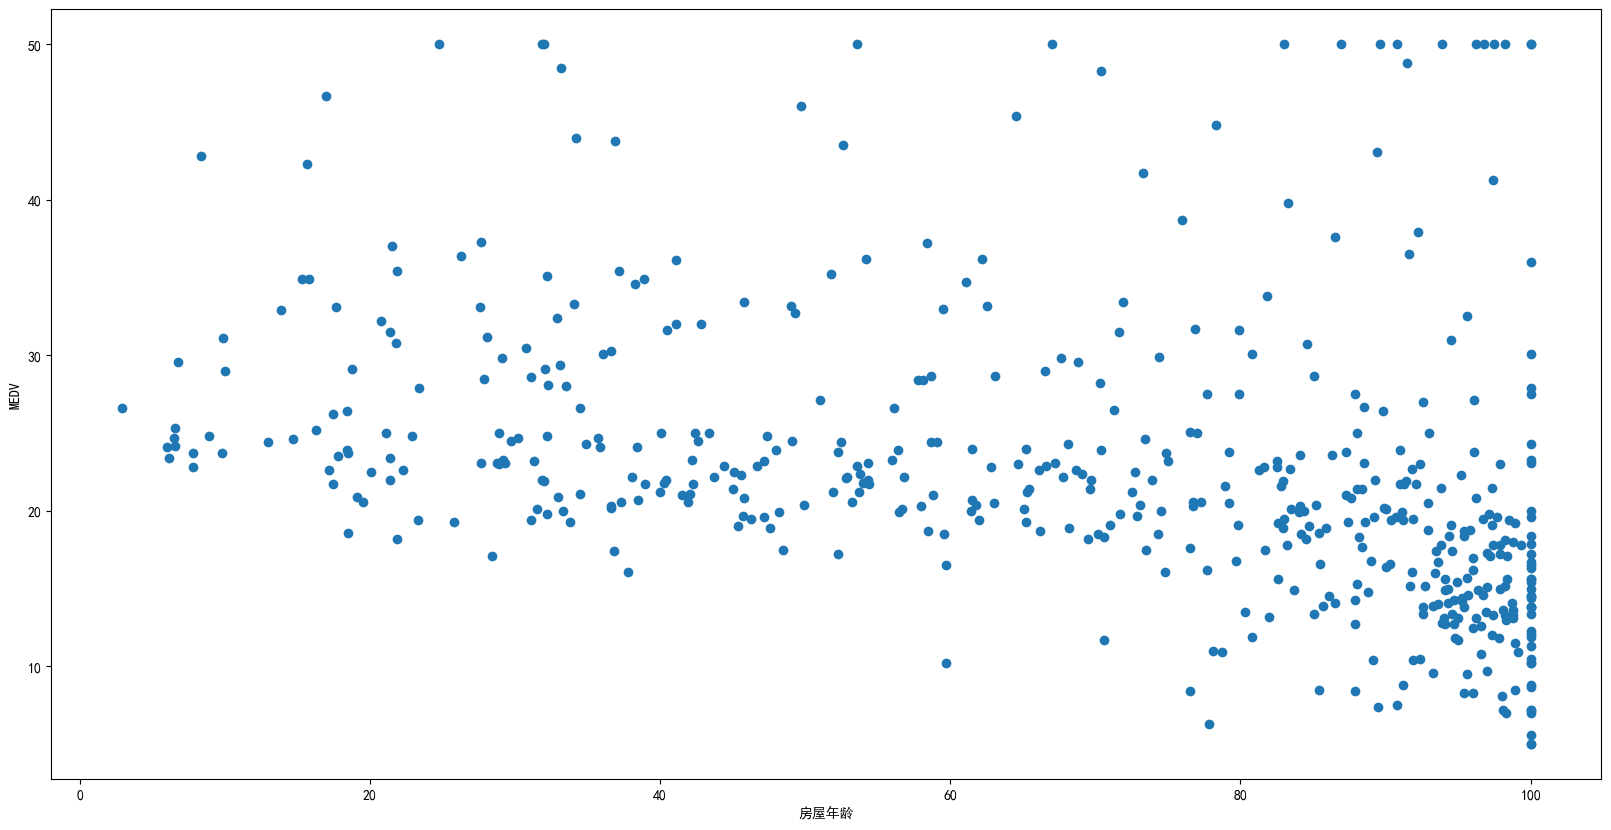

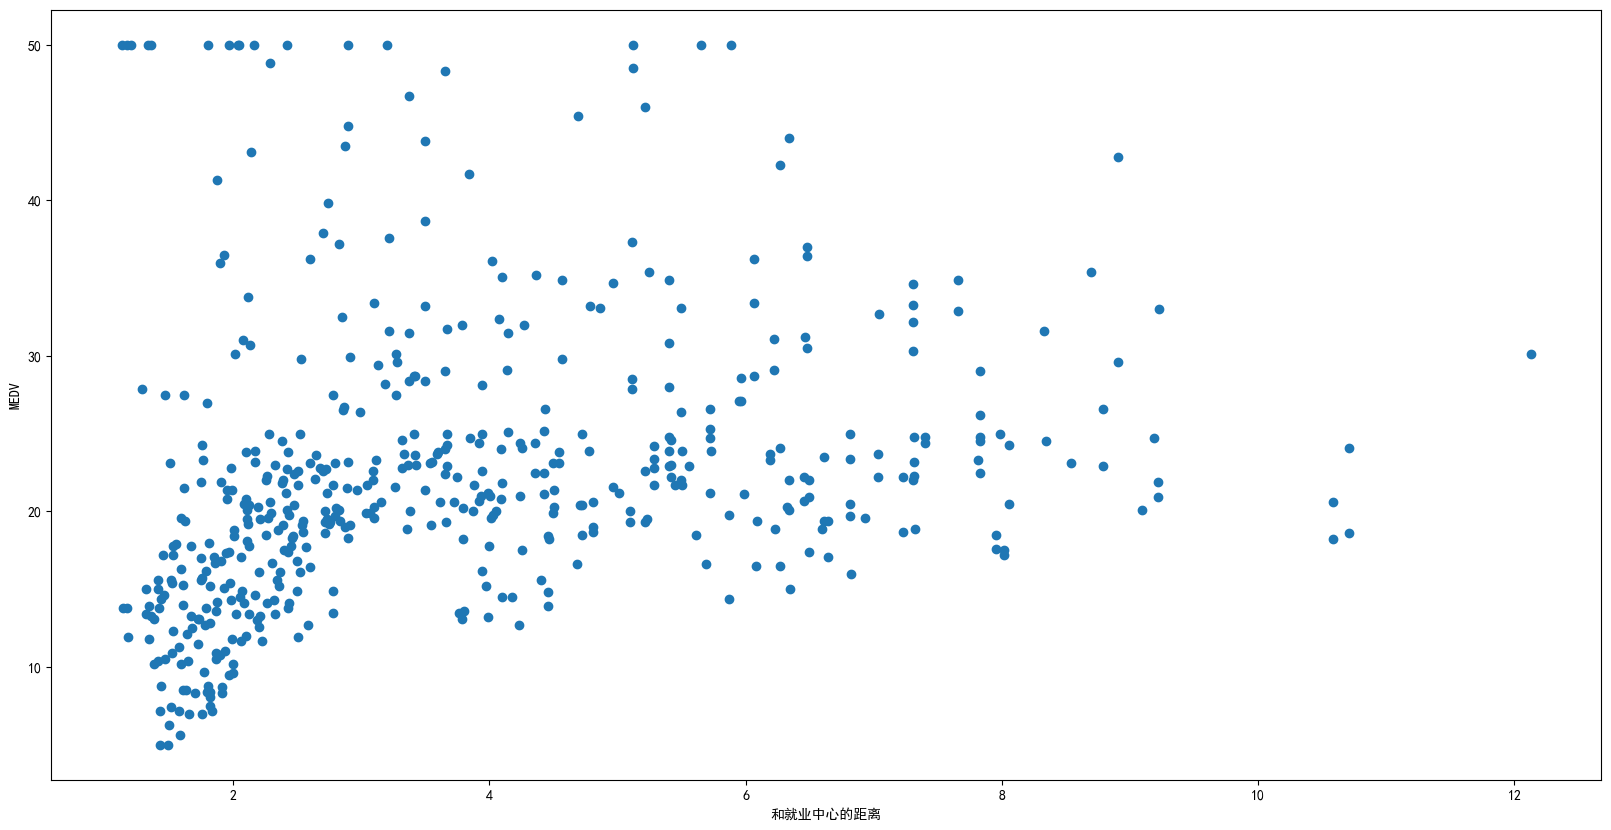

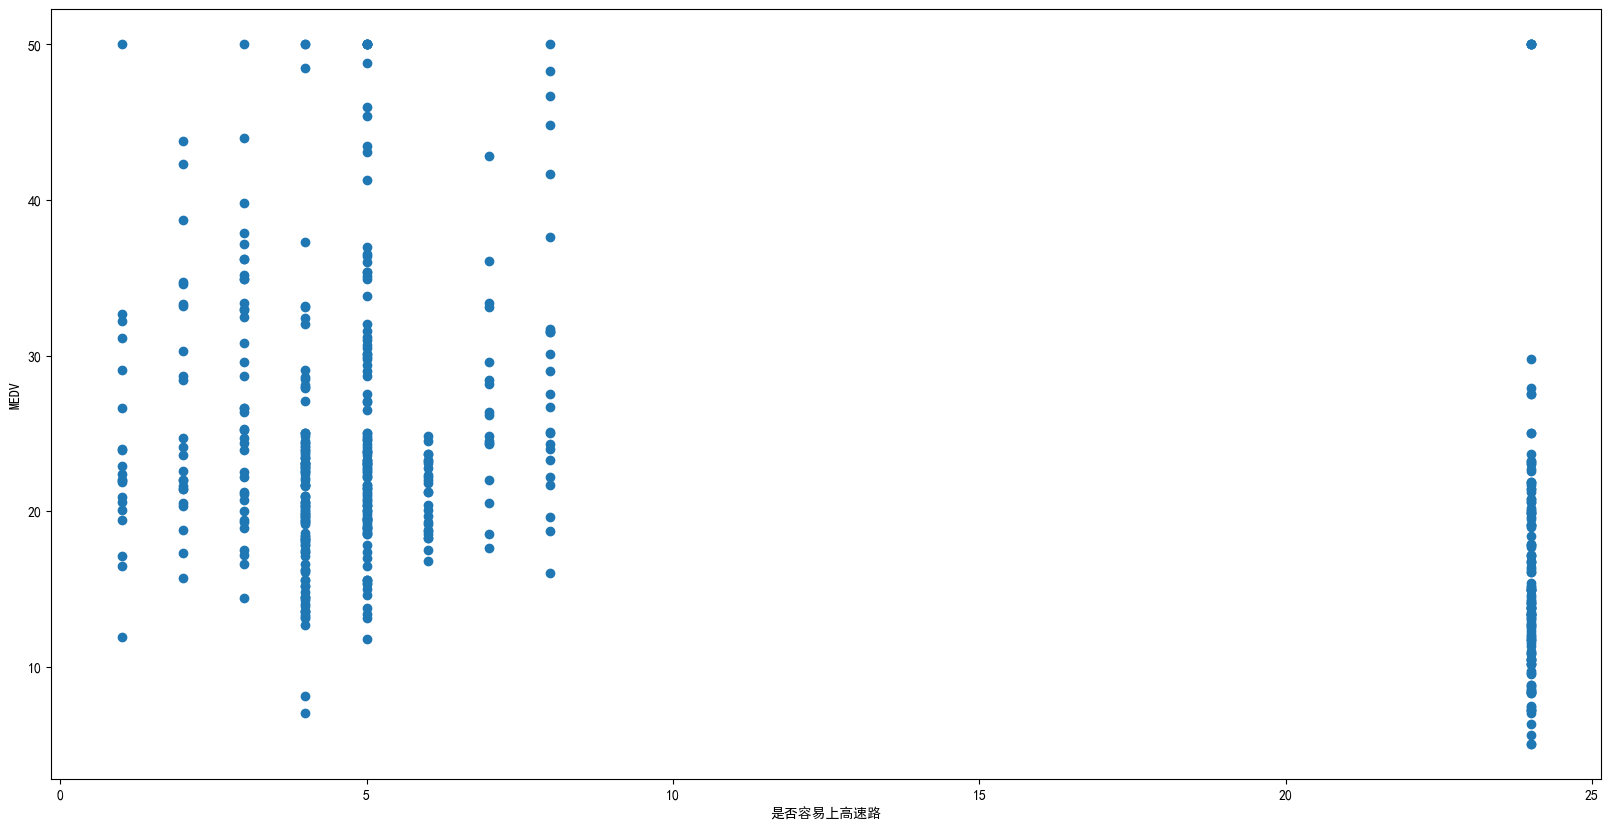

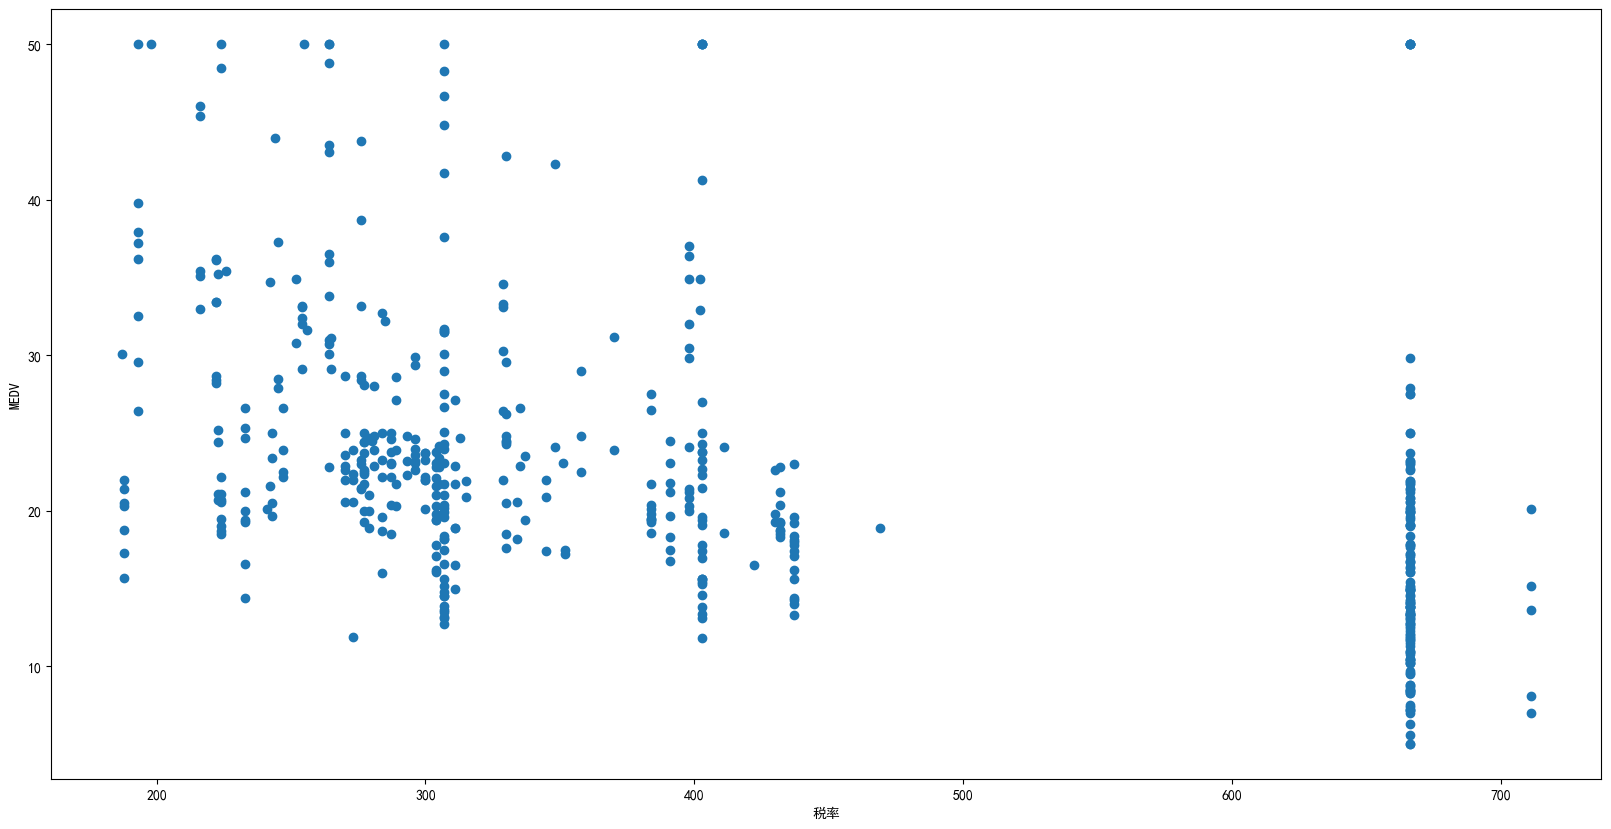

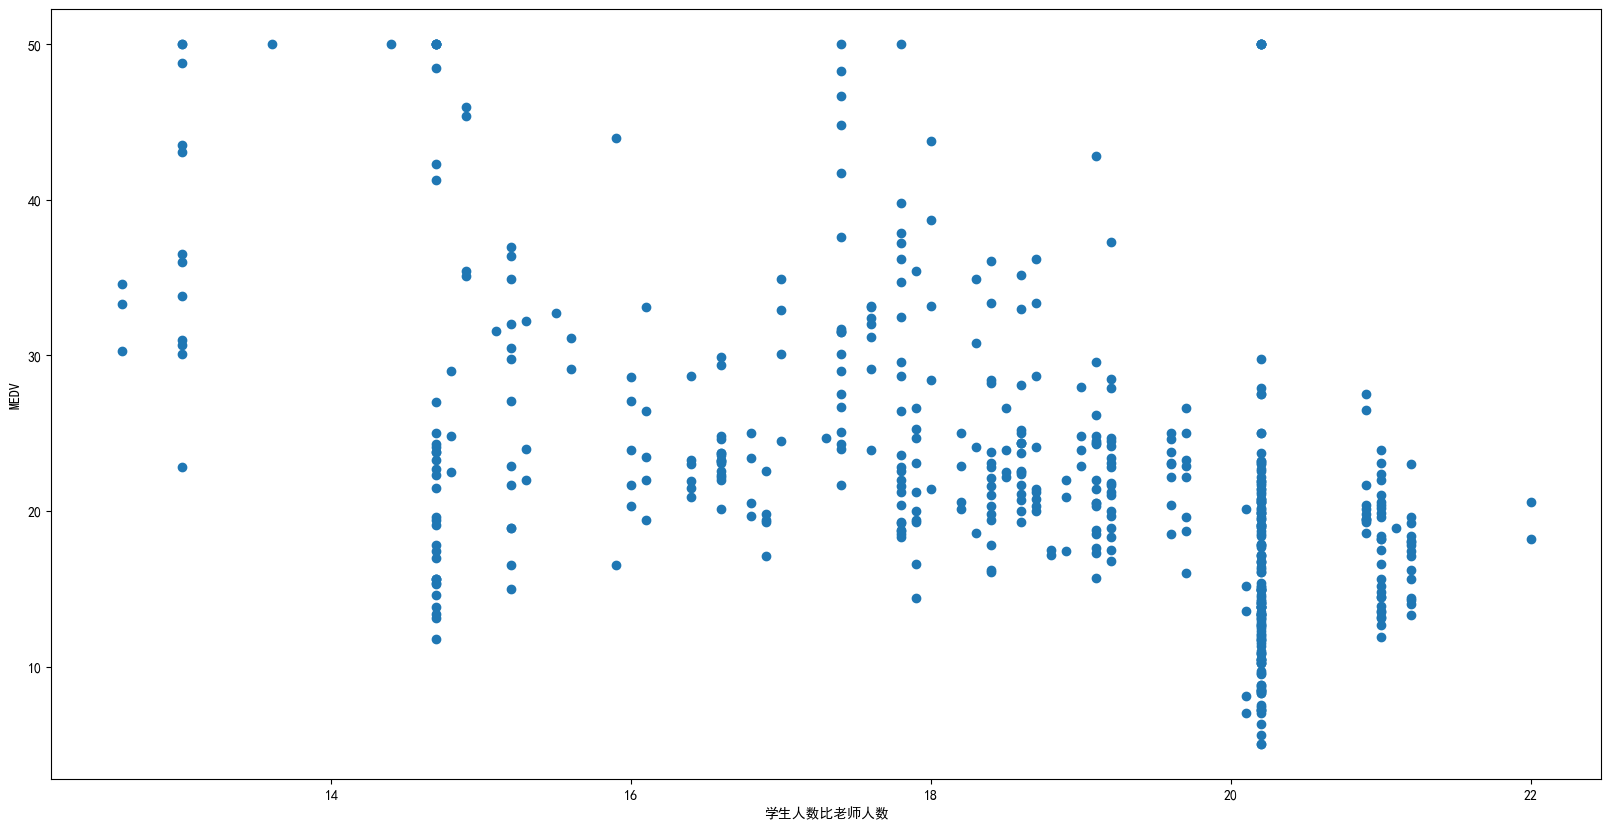

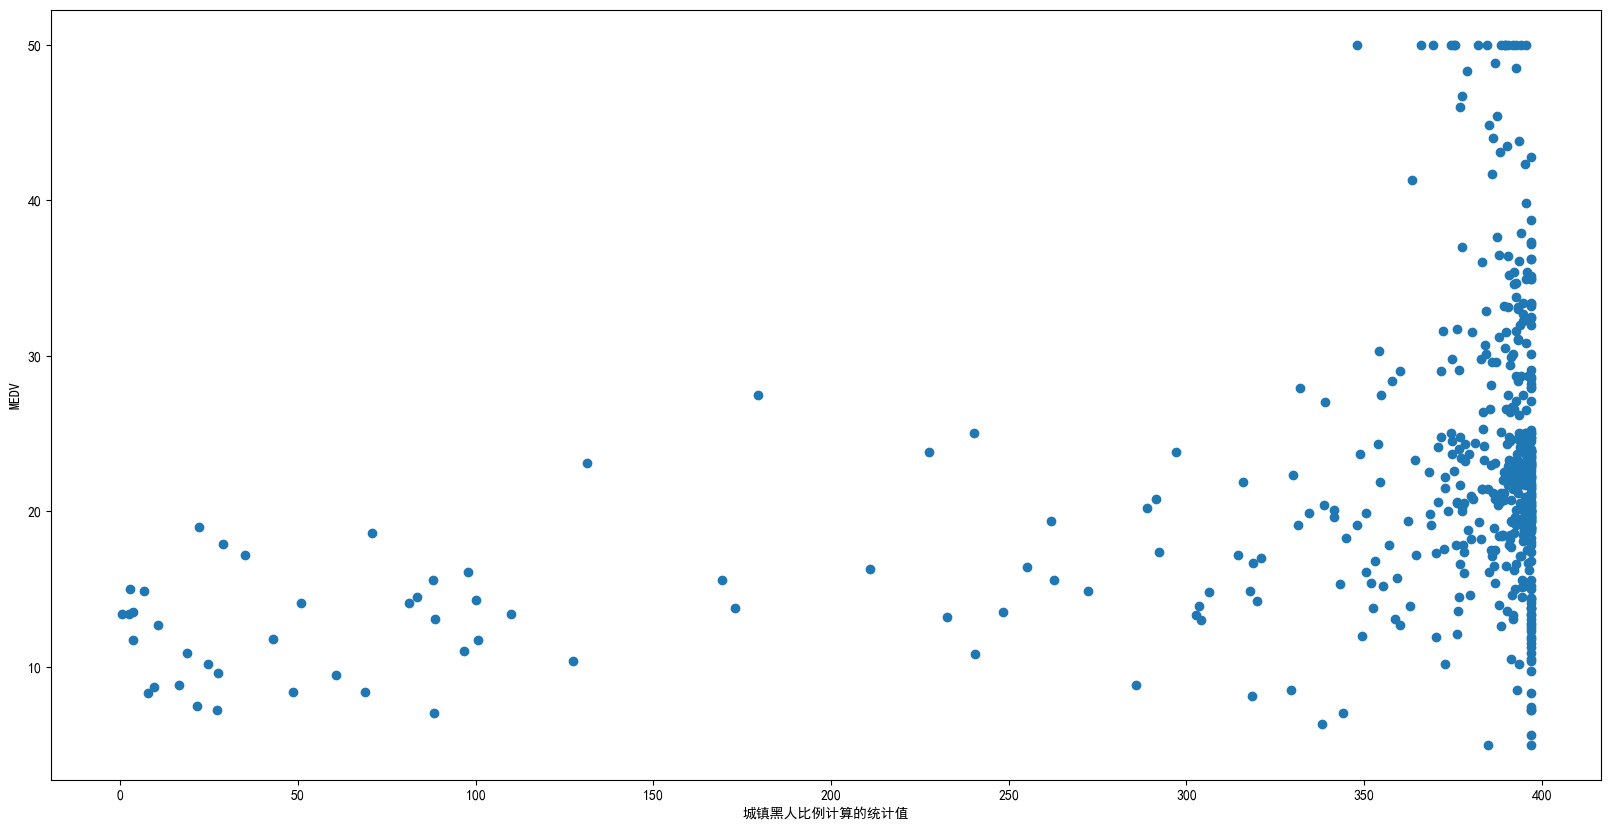

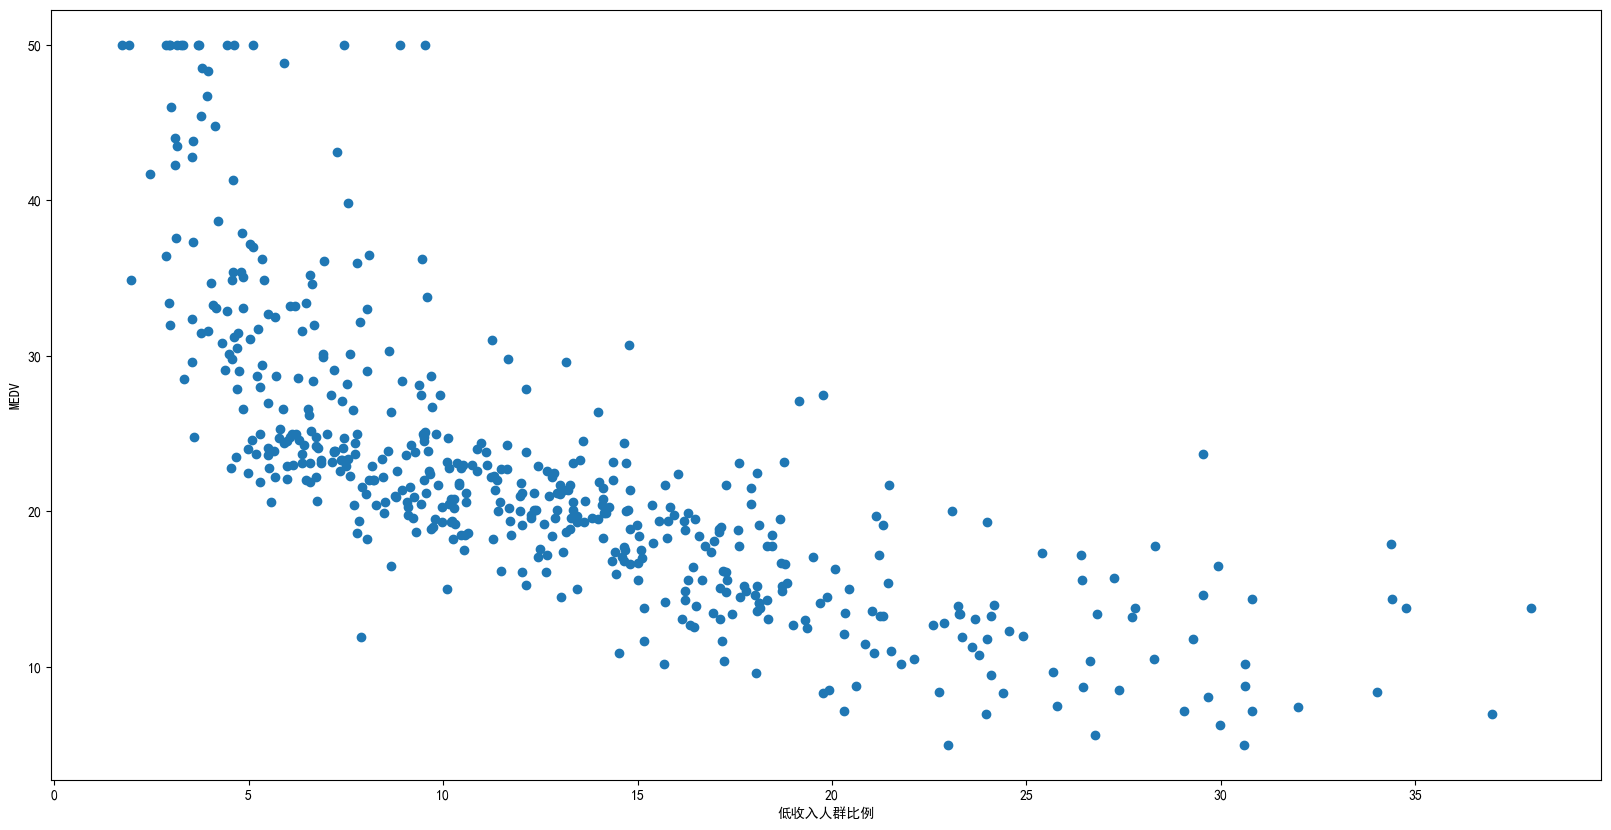

In [4]:
medv = np.array(data['房价中位数'])
plt.style.use({'figure.figsize':(20,10)})
#各个因素与房价关系
for i in range(13):
    x = np.array(data[ch_names[i]])
    plt.scatter(x, medv)
    plt.xlabel(ch_names[i])
    plt.ylabel('MEDV')
    plt.show()

In [5]:
#各因素的相关性
print(data.corr())

                         城镇人均犯罪率  占地面积超过25000平方英尺的住宅用地比例  非零售商业用地占比      是否临河  \
城镇人均犯罪率                 1.000000               -0.200469   0.406583 -0.055892   
占地面积超过25000平方英尺的住宅用地比例 -0.200469                1.000000  -0.533828 -0.042697   
非零售商业用地占比               0.406583               -0.533828   1.000000  0.062938   
是否临河                   -0.055892               -0.042697   0.062938  1.000000   
氮氧化物浓度                  0.420972               -0.516604   0.763651  0.091203   
房屋房间数                  -0.219247                0.311991  -0.391676  0.091251   
房屋年龄                    0.352734               -0.569537   0.644779  0.086518   
和就业中心的距离               -0.379670                0.664408  -0.708027 -0.099176   
是否容易上高速路                0.625505               -0.311948   0.595129 -0.007368   
税率                      0.582764               -0.314563   0.720760 -0.035587   
学生人数比老师人数               0.289946               -0.391679   0.383248 -0.121515   
城镇黑人比例计算的统计值           -0.38

array([[<Axes: title={'center': '城镇人均犯罪率'}>,
        <Axes: title={'center': '占地面积超过25000平方英尺的住宅用地比例'}>,
        <Axes: title={'center': '非零售商业用地占比'}>,
        <Axes: title={'center': '是否临河'}>],
       [<Axes: title={'center': '氮氧化物浓度'}>,
        <Axes: title={'center': '房屋房间数'}>,
        <Axes: title={'center': '房屋年龄'}>,
        <Axes: title={'center': '和就业中心的距离'}>],
       [<Axes: title={'center': '是否容易上高速路'}>,
        <Axes: title={'center': '税率'}>,
        <Axes: title={'center': '学生人数比老师人数'}>,
        <Axes: title={'center': '城镇黑人比例计算的统计值'}>],
       [<Axes: title={'center': '低收入人群比例'}>,
        <Axes: title={'center': '房价中位数'}>, <Axes: >, <Axes: >]],
      dtype=object)

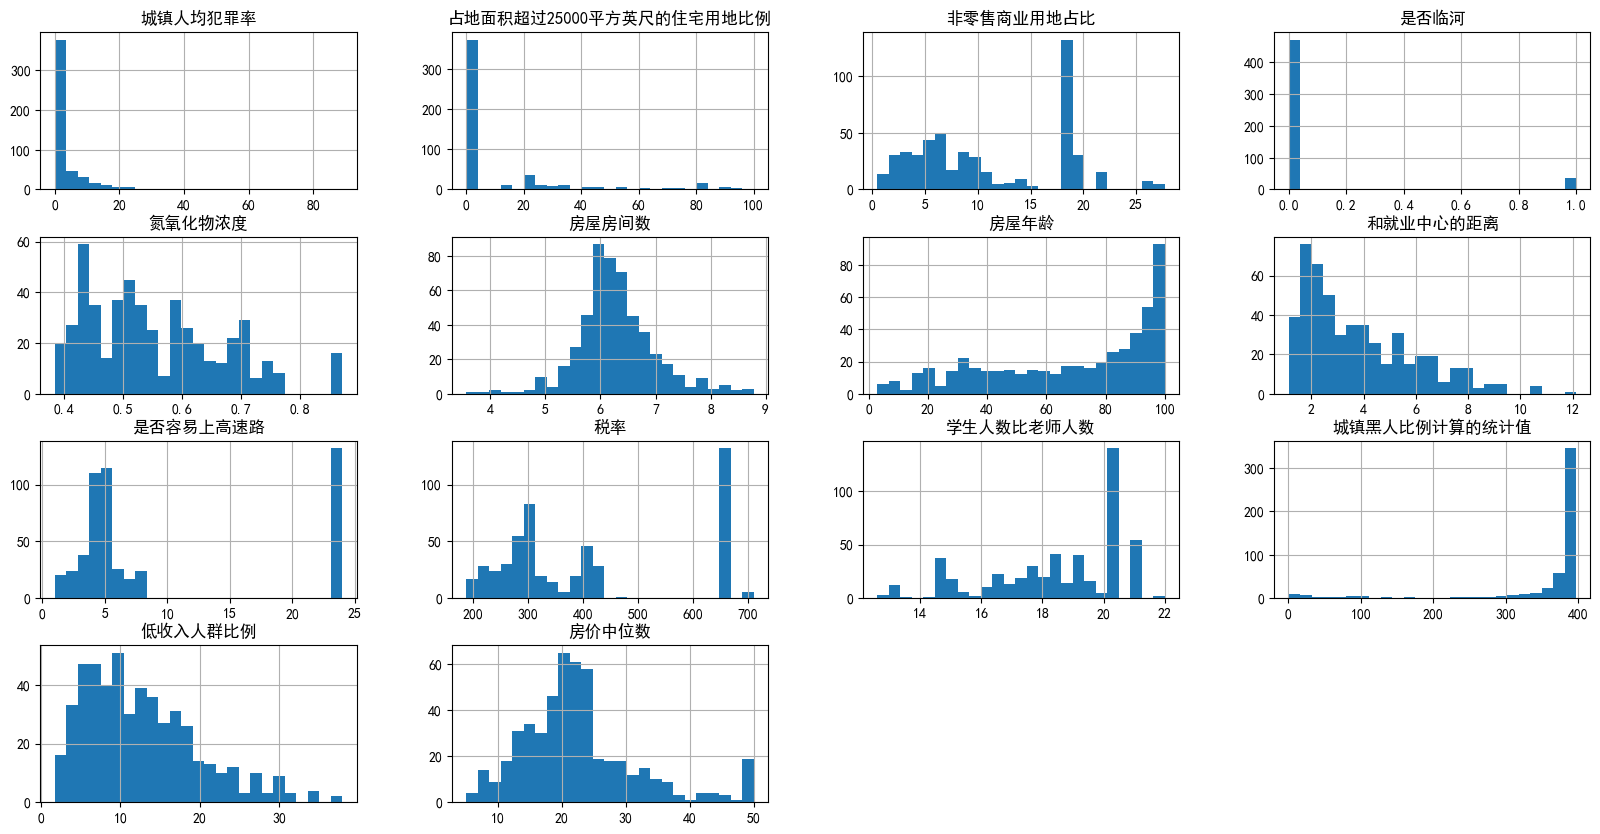

In [6]:
#直方图
data.hist(bins=25)

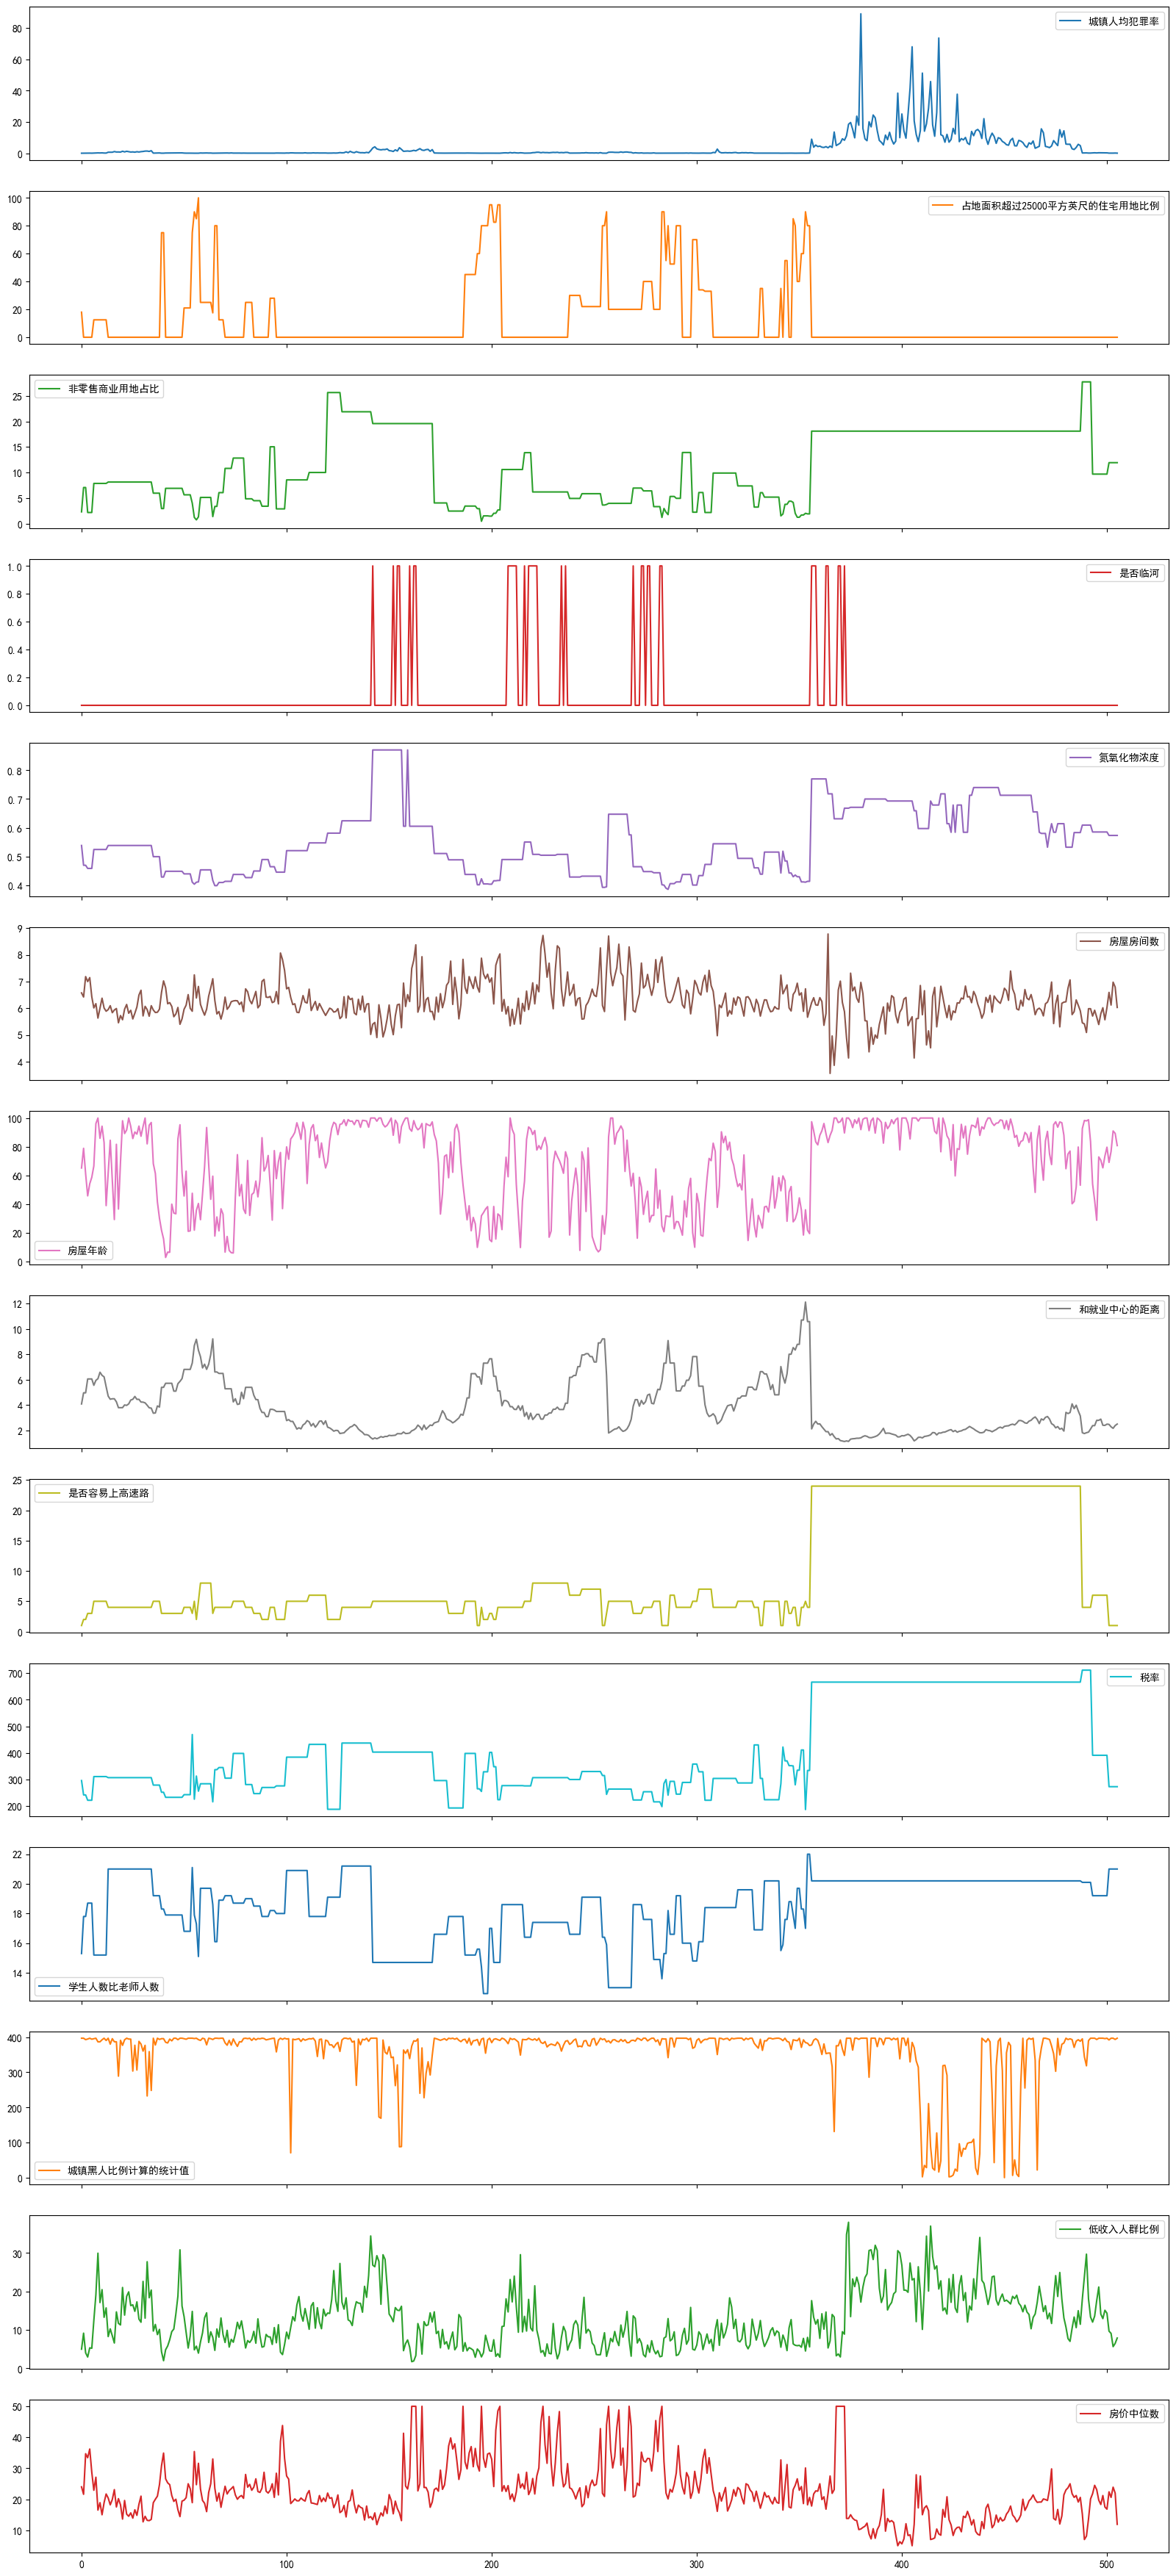

In [7]:
#每个因素的可视化
data.plot(subplots=True, figsize=(20, 45))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X = data.drop(['房价中位数'], axis = 1)
# print(X)
y = data['房价中位数']
# print(y)

In [9]:
#划分训练集
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.2, random_state=888)
#实例化回归模型
model = LinearRegression()
#拟合训练集
model.fit(X_train,y_train)
#拟合效果评估
model.score(X_test, y_test)
#预测结果
y_pred = model.predict(X_test)

print(X_train.shape)
print(y_train.shape)
print(y_pred)
print(model.score(X_test, y_test))

(404, 13)
(404,)
[22.17123289 35.55703211 20.8943971  20.19609888 20.02689174 21.21700868
 30.82764123 28.81457412 24.62625139 12.51737207 21.66809395 26.01419263
 20.34518116 23.2663366  22.11437669 13.07554361 17.13768497 21.97900546
 27.3708199  28.01916788 24.41448177 34.36001821 23.94274892 26.83103321
 33.1323688  13.13104618 20.66162225 17.3953725  24.90599552 25.93687134
 25.43031713 24.81956864 17.66949657 13.13904413 22.14029635 35.50302904
 16.23087515 19.89717175 23.06369597 20.00735812 32.84777096 25.7275347
 30.95015644 23.70226829 21.41232494 13.11049316 33.15680287 20.24535073
 -5.21091931 27.52962052 25.0985891  13.96531508 14.09019168 27.38604613
 14.21771639 25.46457847 17.74201965 19.33771417 35.67022047 26.05415131
 32.57600176 24.56533259 31.75366611 28.13798769 31.05895476 24.53318847
 23.37137553 30.55484544 32.28276335 20.8739582  24.73484582 19.61125447
 36.94909625 41.49006389 23.0520405  18.45466235 15.93100182 36.026834
 14.71237394  5.08946136 10.76502268 

In [10]:
#预测值
model.predict(X_test)

array([22.17123289, 35.55703211, 20.8943971 , 20.19609888, 20.02689174,
       21.21700868, 30.82764123, 28.81457412, 24.62625139, 12.51737207,
       21.66809395, 26.01419263, 20.34518116, 23.2663366 , 22.11437669,
       13.07554361, 17.13768497, 21.97900546, 27.3708199 , 28.01916788,
       24.41448177, 34.36001821, 23.94274892, 26.83103321, 33.1323688 ,
       13.13104618, 20.66162225, 17.3953725 , 24.90599552, 25.93687134,
       25.43031713, 24.81956864, 17.66949657, 13.13904413, 22.14029635,
       35.50302904, 16.23087515, 19.89717175, 23.06369597, 20.00735812,
       32.84777096, 25.7275347 , 30.95015644, 23.70226829, 21.41232494,
       13.11049316, 33.15680287, 20.24535073, -5.21091931, 27.52962052,
       25.0985891 , 13.96531508, 14.09019168, 27.38604613, 14.21771639,
       25.46457847, 17.74201965, 19.33771417, 35.67022047, 26.05415131,
       32.57600176, 24.56533259, 31.75366611, 28.13798769, 31.05895476,
       24.53318847, 23.37137553, 30.55484544, 32.28276335, 20.87

In [11]:
#真实值
print(list(y_test))

[22.4, 32.4, 21.7, 24.5, 16.8, 21.1, 29.4, 28.7, 21.5, 13.6, 21.4, 24.8, 16.8, 19.4, 21.7, 17.2, 17.1, 18.7, 22.3, 25.0, 24.4, 34.6, 20.1, 22.3, 26.7, 15.6, 19.5, 14.3, 22.7, 21.6, 25.0, 24.7, 17.8, 12.7, 22.7, 46.7, 20.2, 27.1, 25.0, 19.9, 32.0, 23.2, 32.2, 19.2, 21.0, 13.4, 31.6, 16.7, 7.0, 24.5, 24.2, 11.5, 10.9, 22.0, 15.7, 25.3, 14.9, 15.0, 33.4, 28.7, 50.0, 25.0, 29.9, 26.6, 28.7, 20.5, 23.0, 37.0, 30.3, 16.2, 22.2, 19.9, 36.0, 48.5, 26.4, 19.8, 17.8, 38.7, 11.7, 13.8, 15.2, 30.1, 8.1, 30.1, 24.0, 17.8, 13.8, 7.5, 41.3, 20.1, 13.9, 50.0, 20.3, 22.6, 25.0, 20.5, 12.8, 19.5, 22.0, 19.1, 24.6, 50.0]


In [14]:
#平均绝对误差
print(metrics.mean_absolute_error(y_test,y_pred))
#R平方，拟合效果评估
print(metrics.r2_score(y_test,y_pred))
#均方误差
print(metrics.mean_squared_error(y_test,y_pred))
#均方根误差
from math import sqrt
print(sqrt(metrics.mean_squared_error(y_test,y_pred)))

3.1432440289344687
0.7558932220633301
19.103888415426972
4.370799516727686
